In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Tutorial 1: Defining a Camera

The first step in creating a sstcam-simulation script is defining the camera. The description of a Camera in the sstcam-simulation package is contained within the `Camera` class. This is simply a container for the different aspects important for the simulation processing. This notebook describes some of the more complex contents of the `Camera` class.

In [2]:
from sstcam_simulation import Camera
Camera?

Init signature:
Camera(
    continuous_readout_duration: int = 1000,
    n_waveform_samples: int = 128,
    trigger_threshold: float = 2,
    digital_trigger_length: float = 8,
    lookback_time: float = 20,
    mapping: sstcam_simulation.camera.mapping.SSTCameraMapping = <sstcam_simulation.camera.mapping.SSTCameraMapping object at 0x7f90062b23d0>,
    photoelectron_pulse: sstcam_simulation.camera.pulse.PhotoelectronPulse = <sstcam_simulation.camera.pulse.GaussianPulse object at 0x7f9005c229d0>,
    reference_pulse: sstcam_simulation.camera.pulse.PhotoelectronPulse = <property object at 0x7f900623d050>,
    photoelectron_spectrum: sstcam_simulation.camera.spe.SPESpectrum = <sstcam_simulation.camera.spe.SiPMGentileSPE object at 0x7f900632c2d0>,
    readout_noise: sstcam_simulation.camera.noise.ElectronicNoise = <sstcam_simulation.camera.noise.PerfectElectronics object at 0x7f900621c710>,
    digitisation_noise: sstcam_simulation.camera.noise.ElectronicNoise = <sstcam_simulation.camera.n

## Defaults

All aspects of the `Camera` have a default value, and a reasonable description of the camera can be easily obtained to explore the other aspects of this camera.

In [3]:
camera = Camera()
print(camera)

Camera(continuous_readout_duration=1000, n_waveform_samples=128, trigger_threshold=2, digital_trigger_length=8, lookback_time=20, mapping=<sstcam_simulation.camera.mapping.SSTCameraMapping object at 0x7f90062b23d0>, photoelectron_pulse=<sstcam_simulation.camera.pulse.GaussianPulse object at 0x7f9005c229d0>, reference_pulse=<sstcam_simulation.camera.pulse.GaussianPulse object at 0x7f9005c229d0>, photoelectron_spectrum=<sstcam_simulation.camera.spe.SiPMGentileSPE object at 0x7f900632c2d0>, readout_noise=<sstcam_simulation.camera.noise.PerfectElectronics object at 0x7f900621c710>, digitisation_noise=<sstcam_simulation.camera.noise.PerfectElectronics object at 0x7f900621c690>, coupling=<sstcam_simulation.camera.coupling.NoCoupling object at 0x7f900621c250>)


/Users/Jason/Software/sstcam-simulation/sstcam_simulation/camera/camera.py:42: DeprecationWarning: reference_pulse is deprecated, replaced by photoelectron_pulse
  warnings.warn(msg, DeprecationWarning)


In [4]:
type(camera.photoelectron_spectrum) is property

False

In [5]:
type(property)

type

# Continuous Readout

As true continuous readout would be very dificult to simulate, an emulation of it is attempted with a readout that is longer than a typical waveform length, and is more finely samples (with sample widths of 0.2 ns).

The readout length (in nanoseconds) is defined with the `continuous_readout_duration` argument.

In [6]:
camera = Camera()
print("default continuous_readout_duration = ", camera.continuous_readout_duration)

default continuous_readout_duration =  1000


In [7]:
camera = Camera(continuous_readout_duration=20000)
print("continuous_readout_duration = ", camera.continuous_readout_duration)

continuous_readout_duration =  20000


The sample width and a time axis for the continuous readout can be accessed through properties of the `Camera`

In [8]:
print(camera.continuous_readout_sample_width)

0.2


In [9]:
print(camera.continuous_readout_time_axis)

[0.00000e+00 2.00000e-01 4.00000e-01 ... 1.99994e+04 1.99996e+04
 1.99998e+04]


## Pixel/Superpixel Mapping

The `SSTCameraMapping` class contains information about the camera mapping and pixel neighbours. It can also be used to create `CameraImage` plots (inherted from CHECLabPy).

In [10]:
from sstcam_simulation.camera import SSTCameraMapping
SSTCameraMapping?

Init signature: SSTCameraMapping(n_pixels=None)
Docstring:      <no docstring>
Init docstring:
Container for the camera coordinates of the SST Camera, and the mapping
between different coordinate sets (e.g. pixel to superpixel)

Parameters
----------
n_pixels : int
    Number of pixels in the simulated camera

Attributes
----------
self.n_pixels : int
    Number of pixels in the simulated camera
self.pixel : CameraCoordinate
    Container for the pixel coordinates
self.pixel_to_superpixel : ndarray
    Superpixel index for each pixel. Shape: (n_pixels)
self.n_superpixels : int
    Number of superpixels in the simulated camera
self.superpixel : CameraCoordinate
    Container for the superpixel coordinates
File:           ~/Software/sstcam-simulation/sstcam_simulation/camera/mapping.py
Type:           type
Subclasses:     


Total number of pixel neighbours =  7910


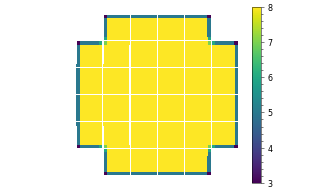

In [11]:
from sstcam_simulation.plotting import CameraImage

camera = Camera()
camera_image = CameraImage.from_coordinates(camera.mapping.pixel)
print("Total number of pixel neighbours = ", len(camera.mapping.pixel.neighbours))
n_neighbours = np.zeros(camera.mapping.n_pixels)
np.add.at(n_neighbours, camera.mapping.pixel.neighbours, 1)
camera_image.image = n_neighbours
camera_image.add_colorbar()

Total number of superpixel neighbours =  1910


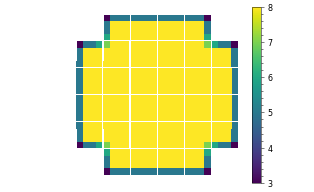

In [12]:
camera = Camera()
camera_image = CameraImage.from_coordinates(camera.mapping.superpixel)
print("Total number of superpixel neighbours = ", len(camera.mapping.superpixel.neighbours))
n_neighbours = np.zeros(camera.mapping.n_superpixels)
np.add.at(n_neighbours, camera.mapping.superpixel.neighbours, 1)
camera_image.image = n_neighbours
camera_image.add_colorbar()

One can specify a camera with as many pixels as it required (e.g. 1 pixel, 4 pixels, 64 pixels...). The number of superpixels is calculated accounting for this configuration.

N_pixels =  1
N_superpixels =  1
Total number of pixel neighbours =  0


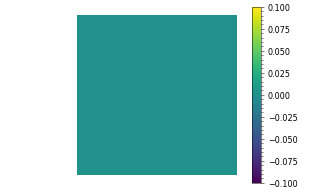

In [13]:
camera = Camera(mapping=SSTCameraMapping(n_pixels=1))
print("N_pixels = ", camera.mapping.n_pixels)
print("N_superpixels = ", camera.mapping.n_superpixels)

camera_image = CameraImage.from_coordinates(camera.mapping.pixel)
print("Total number of pixel neighbours = ", len(camera.mapping.pixel.neighbours))
n_neighbours = np.zeros(camera.mapping.n_pixels)
np.add.at(n_neighbours, camera.mapping.pixel.neighbours, 1)
camera_image.image = n_neighbours
camera_image.add_colorbar()

## Photoelectron Pulse

The `PhotoelectronPulse` is a base for classes which defines the reference pulse shape of a single photoelectron. When obtaining the camera readout, this pulse shape is convolved with the photoelectrons. The `ReferencePulse` subclass defines the `_function` method, which returns the pulse shape when given the an ndarray containing time values. The `__init__` for a `PhotoelectronPulse` subclass takes in whatever paramters needed to describe the pulse, in addition to the `length` argument, which defines the length for the reference pulse (in nanoseconds). From the definition in `_function` and the configuration arguments to `__init__`, the reference pulse array is generated ready to be used in the convolution.

By default the reference pulse is normalised to have an area of 1. Therefore the waveform samples are in a differential charge unit (e.g. photoelectrons per sample) and by summing the samples of a pulse, the total charge of the signal is obtained. Alternatively, by specifying the `mv_per_pe` argument to the `PhotoelectronPulse` subclass, the height of the pulse is fixed, and the units of the waveform samples can be considered to be in mV. This is useful to control the signal-to-noise of the pulse while varying pulse shapes.

In [14]:
from sstcam_simulation.camera.pulse import PhotoelectronPulse, GaussianPulse
PhotoelectronPulse?

Init signature: PhotoelectronPulse(duration, mv_per_pe=None)
Docstring:      <no docstring>
Init docstring:
Base for classes which define the reference pulse shape for a single
photoelectron.

The pulse is evaluated on initialisation.
For a new pulse to be defined, a new class should be initialised.

Parameters
----------
duration : int
    Duration of the reference pulse in nanoseconds
mv_per_pe : float
    Height of a 1 photoelectron pulse in mV. If this is set, then the
    units of the waveform samples can be globally considered as mV
    instead of photoelectrons/sample.
    If this is None, then the height of a 1 photoelectron pulse is
    determined such that the pulse area is 1
File:           ~/Software/sstcam-simulation/sstcam_simulation/camera/pulse.py
Type:           ABCMeta
Subclasses:     ReferencePulse, GenericPulse, GaussianPulse


In [15]:
def show_pulse(pulse):
    camera = Camera(photoelectron_pulse=pulse)
    plt.plot(camera.photoelectron_pulse.time, camera.photoelectron_pulse.amplitude)
    plt.xlabel("Time (ns)")
    _ = plt.ylabel("Amplitude")
    print(f"Height = {pulse.height:.2f}, Area = {pulse.area:.2f}")

Height = 0.13, Area = 1.00


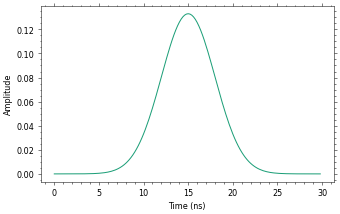

In [16]:
show_pulse(GaussianPulse(mean=15, sigma=3, duration=30))

Height = 0.08, Area = 1.00


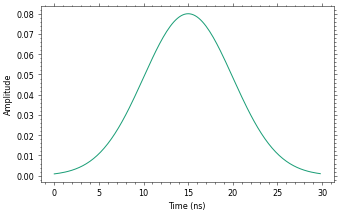

In [17]:
show_pulse(GaussianPulse(mean=15, sigma=5, duration=30))

Height = 4.00, Area = 30.08


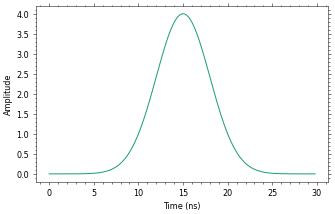

In [18]:
show_pulse(GaussianPulse(mean=15, sigma=3, duration=30, mv_per_pe=4))

## SPE Spectrum

The `SPESpectrum` class is the base for classes which define the Probability Density Function for the possible charges a photosensor can report a single photoelectron as. This is achieved via two possible approached. The first approach is where an explicit PDF template is defined, with which [Inverse Transform Sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling) is performed to obtain a random value of charge weighted by the spectrum. This is the approach for `SiPMGentileSPE`. The second approach is to add the additional photoelectrons that result from optical crosstalk, according to the probability that describes the process. This is the approach used in `SiPMPrompt` and `SiPMDelayed`.

By default, the spectrum is normalised to return an average charge of 1 (such that the units of charge are in photoelectrons). This can be deactivated with `normalise_charge=False` to instead obtain charge in units of "number of fired microcells". In this mode, the pulse amplitude will increase with increased optical crosstalk, as one would expect from the waveform read from the camera (in mV).

In [19]:
from sstcam_simulation.camera.spe import SPESpectrum, SiPMGentileSPE
SPESpectrum?

Init signature: SPESpectrum(normalise_charge=True)
Docstring:      <no docstring>
Init docstring:
Base for classes which define the probability density function of the
charge for a single photon detection.

NOTE: this is **not** the spectrum for an "average illumination" i.e. a Poisson
average close to one. This is the probability density function of the
possible charges a single photoelectron can be measured as. This spectrum
therefore defines the Excess Noise Factor (ENF) of the photosensor. Also,
by definition, it does not include the pedestal peak.

The spectrum is evaluated on initialisation.
For a new spectrum to be defined, a new class should be initialised.

Parameters
----------
normalise_charge : bool
    If True, the charge is normalised to in units of photoelectrons. The
    average charge produced for a single photon detection will equal 1.
    If False, the charge in in units of number of fired microcells.
File:           ~/Software/sstcam-simulation/sstcam_simulation/cam

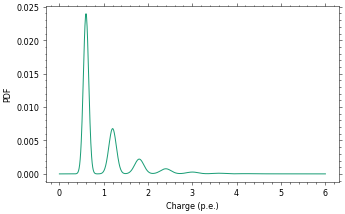

In [20]:
spe_spectrum = SiPMGentileSPE(spe_sigma=0.1, opct=0.4, x_min=0, x_max=10, n_points=1000)
camera = Camera(photoelectron_spectrum=spe_spectrum)
plt.plot(camera.photoelectron_spectrum.x, camera.photoelectron_spectrum.pdf)
plt.xlabel("Charge (p.e.)")
_ = plt.ylabel("PDF")

## Electronic Noise

The `ElectronicNoise` class is the base for classes which define the electronic noise spectrum and fluctuations to be applied to the camera readout and waveform. The tranformation applied to the readout is defined in the `add_to_readout` method in the subclass. This method takes only the `readout` as an argument. The configuration for the electronic noise spectrum is defined in arguments to the `__init__` of the subclass.

There are two arguments to the `Camera` that take an `ElectronicNoise` subclass. Which one is used depends on the desired stage of the readout chain for the application:
- `readout_noise`: Applies the fluctuations to the continuous readout (pre-sampling)
- `digitisation_noise`: Applies the fluctuations to the waveform samples (post-sampling). Not present for trigger discrimination.

Further details on the readout chain stages are decribed in the 3_event_acquisition tutorial.

In [21]:
from sstcam_simulation.camera.noise import ElectronicNoise, GaussianNoise
ElectronicNoise?

Init signature: ElectronicNoise()
Docstring:     
Base for classes which define an electronic noise spectrum, and how it is
applied to the waveform

Can be used for any of the noise components
File:           ~/Software/sstcam-simulation/sstcam_simulation/camera/noise.py
Type:           ABCMeta
Subclasses:     PerfectElectronics, GaussianNoise


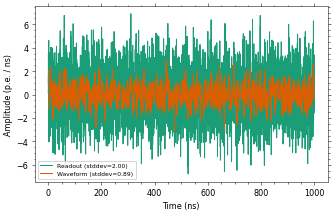

In [22]:
from sstcam_simulation import Photoelectrons, EventAcquisition

stddev = 2
camera = Camera(readout_noise=GaussianNoise(stddev=stddev), n_waveform_samples=1000)
pe = Photoelectrons.empty()
acq = EventAcquisition(camera=camera)
readout = acq.get_continuous_readout(pe)
waveform = acq.get_sampled_waveform(readout)
plt.plot(camera.continuous_readout_time_axis, readout[0], label=f"Readout (stddev={readout.std():.2f})")
plt.plot(waveform[0], label=f"Waveform (stddev={waveform.std():.2f})")
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude (p.e. / ns)")
_ = plt.legend(loc='best')

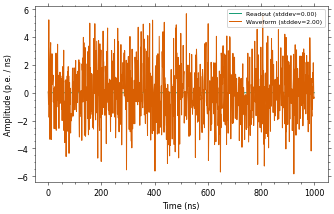

In [23]:
stddev = 2
camera = Camera(digitisation_noise=GaussianNoise(stddev=stddev), n_waveform_samples=1000)
pe = Photoelectrons.empty()
acq = EventAcquisition(camera=camera)
readout = acq.get_continuous_readout(pe)
waveform = acq.get_sampled_waveform(readout)
plt.plot(camera.continuous_readout_time_axis, readout[0], label=f"Readout (stddev={readout.std():.2f})")
plt.plot(waveform[0], label=f"Waveform (stddev={waveform.std():.2f})")
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude (p.e. / ns)")
_ = plt.legend(loc='best')

If a standard-deviation of fluctuations is applied via the `readout_noise` parameter, the fluctuations of the final sampled waveform can be predicted analytically as follows:

In [24]:
stddev = 2
camera = Camera(readout_noise=GaussianNoise(stddev=stddev), n_waveform_samples=1000)
pe = Photoelectrons.empty()
acq = EventAcquisition(camera=camera)
readout = acq.get_continuous_readout(pe)
waveform = acq.get_sampled_waveform(readout)
print(readout.std())
print(waveform.std())
print(stddev/np.sqrt(camera.continuous_readout_sample_division))

2.0004357331299887
0.8946313647957964
0.8944271909999159


## Coupling

The `Coupling` subclasses define the DC/AC coupling behaviour for the readout.

In [25]:
from sstcam_simulation.camera.coupling import Coupling
Coupling?

Init signature: Coupling()
Docstring:     
Base for classes which define the readout coupling, and how it is
applied to the waveform
File:           ~/Software/sstcam-simulation/sstcam_simulation/camera/coupling.py
Type:           ABCMeta
Subclasses:     NoCoupling, ACFilterCoupling, ACOffsetCoupling


No Coupling (Avg = 3.75)
Filter AC Coupling (Avg = 0.01)
Offset AC Coupling (Avg = -0.00)


Text(0.5, 1.0, 'NSB Rate = 100.00 MHz')

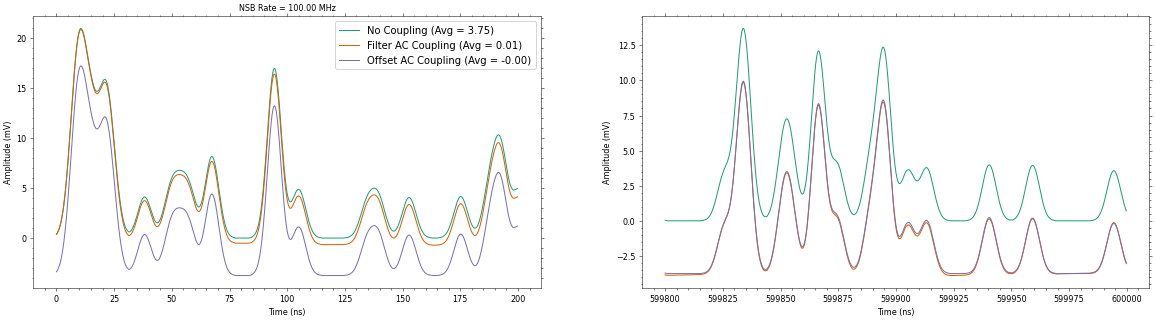

In [26]:
from sstcam_simulation.camera.spe import SiPMPrompt
from sstcam_simulation.camera.coupling import NoCoupling, ACFilterCoupling, ACOffsetCoupling
from sstcam_simulation import PhotoelectronSource
nsb_rate = 100
spectrum = SiPMPrompt(opct=0.2, normalise_charge=False)
pulse = GaussianPulse(mv_per_pe=4)

coupling = {
    "No Coupling": NoCoupling(),
    "Filter AC Coupling": ACFilterCoupling(),
    'Offset AC Coupling': ACOffsetCoupling(nsb_rate, pulse.area, spectrum.average),
}

fig = plt.figure(figsize=(20, 5))
ax_start = fig.add_subplot(1, 2, 1)
ax_end = fig.add_subplot(1, 2, 2)

for name, c in coupling.items():
    camera = Camera(
        continuous_readout_duration=int(6e5),
        # continuous_readout_duration=int(200),
        mapping=SSTCameraMapping(n_pixels=1),
        photoelectron_spectrum=spectrum,
        photoelectron_pulse=pulse,
        coupling=c,
    )
    source = PhotoelectronSource(camera=camera, seed=1)
    acquisition = EventAcquisition(camera=camera)
    pe = source.get_nsb(nsb_rate)
    readout = acquisition.get_continuous_readout(pe)[0]
    # p_readout.ax.plot(camera.continuous_readout_time_axis, readout)
    label = name + f" (Avg = {readout.mean():.2f})"
    print(label)
    ax_start.plot(camera.continuous_readout_time_axis[:1000], readout[:1000], label=label)
    ax_end.plot(camera.continuous_readout_time_axis[-1000:], readout[-1000:], label=label)

ax_start.legend(loc='best', fontsize=10)
ax_start.set_xlabel("Time (ns)")
ax_start.set_ylabel("Amplitude (mV)")
ax_end.set_xlabel("Time (ns)")
ax_end.set_ylabel("Amplitude (mV)")
ax_start.set_title(f"NSB Rate = {nsb_rate:.2f} MHz")

As demonstrated, the `ACFilterCoupling` requires a long readout to reach an equilibrium, which therefore increases the execution time of the simulation significantly. Therefore it is recommended to use `ACOffsetCoupling` in cases where the AC coupling frequency response is not important. However, the default coupling for the `Camera` is `NoCoupling`, as the `ACOffsetCoupling` requires appropriate initialisation (depending on the nsb rate and other camera componenets).